In [35]:
import os
import numpy as np
import pandas as pd

DATA_PATH = os.path.join('datasets','emnist')
def get_data(filename,path=DATA_PATH):
    file_path = path+filename
    df = pd.read_csv(file_path,header=None)
    data = df.iloc[:,1:]
    target = df.iloc[:,0]
    return target,data
    

In [36]:

train_label,train_data = get_data('/emnist-bymerge-train.csv')
test_label,test_data = get_data('/emnist-bymerge-test.csv')
print(train_label.head())
print(train_data.head())

0    24
1    36
2     5
3     6
4    35
Name: 0, dtype: int64
   1    2    3    4    5    6    7    8    9    10  ...   775  776  777  778  \
0    0    0    0    0    0    0    0    0    0    0 ...     0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0 ...     0    0    0    0   
2    0    0    0    0    0    0    0    0    0    0 ...     0    0    0    0   
3    0    0    0    0    0    0    0    0    0    0 ...     0    0    0    0   
4    0    0    0    0    0    0    0    0    0    0 ...     0    0    0    0   

   779  780  781  782  783  784  
0    0    0    0    0    0    0  
1    0    0    0    0    0    0  
2    0    0    0    0    0    0  
3    0    0    0    0    0    0  
4    0    0    0    0    0    0  

[5 rows x 784 columns]


In [37]:
train_label.value_counts()

1     38304
7     36020
3     35285
0     34618
2     34307
6     34150
8     33924
9     33882
4     33656
5     31280
24    27664
39    24657
28    23509
21    20381
46    18248
30    15388
18    14733
45    14060
12    12963
22    11612
43    11444
25    10748
38    10152
36    10009
29     9766
15     9098
42     8682
23     8237
31     7588
32     7403
34     7092
10     6411
19     5689
33     5598
35     5416
37     5080
27     5047
20     4998
14     4925
13     4606
11     3874
41     3693
17     3097
44     2966
26     2603
40     2535
16     2534
Name: 0, dtype: int64

In [38]:
# The merged classes, as suggested by the NIST, are for the letters C, I, J, K, L, M, O, P, S, U,V, W, X, Y and Z
def getlabeldict(file,path = DATA_PATH):
    lbl_dict = {}
    with open(path+file) as f:
        for line in f.readlines():
            line = line.split(' ')
            lbl_dict[line[0]] = str(chr(int(line[1])))
    return lbl_dict


In [39]:
lbl_dict = getlabeldict('/emnist-bymerge-mapping.txt')
print(lbl_dict.items())

dict_items([('0', '0'), ('1', '1'), ('2', '2'), ('3', '3'), ('4', '4'), ('5', '5'), ('6', '6'), ('7', '7'), ('8', '8'), ('9', '9'), ('10', 'A'), ('11', 'B'), ('12', 'C'), ('13', 'D'), ('14', 'E'), ('15', 'F'), ('16', 'G'), ('17', 'H'), ('18', 'I'), ('19', 'J'), ('20', 'K'), ('21', 'L'), ('22', 'M'), ('23', 'N'), ('24', 'O'), ('25', 'P'), ('26', 'Q'), ('27', 'R'), ('28', 'S'), ('29', 'T'), ('30', 'U'), ('31', 'V'), ('32', 'W'), ('33', 'X'), ('34', 'Y'), ('35', 'Z'), ('36', 'a'), ('37', 'b'), ('38', 'd'), ('39', 'e'), ('40', 'f'), ('41', 'g'), ('42', 'h'), ('43', 'n'), ('44', 'q'), ('45', 'r'), ('46', 't')])


In [40]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 697932 entries, 0 to 697931
Columns: 784 entries, 1 to 784
dtypes: int64(784)
memory usage: 4.1 GB


5


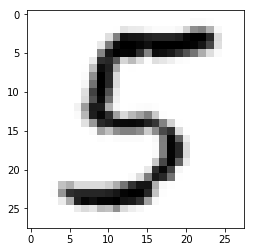

In [41]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
print(lbl_dict[str(train_label.values[11])])
image = train_data.values[11].reshape([28, 28])
image = image.transpose()
plt.imshow(image, cmap = mpl.cm.binary)
plt.show()

In [42]:
def rotate(image):
    image = image.reshape([28, 28])
    image = image = image.transpose()
    return image.reshape([28 * 28])
train_data = np.apply_along_axis(rotate,1,train_data)
test_data = np.apply_along_axis(rotate,1,test_data)

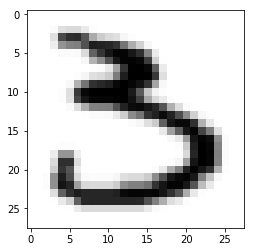

In [44]:
plt.imshow(train_data[12].reshape([28, 28]), cmap = mpl.cm.binary)
plt.show()

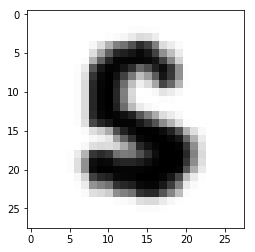

S


In [12]:
plt.imshow(test_data[2].reshape([28, 28]), cmap = mpl.cm.binary)
plt.show()
print(lbl_dict[str(test_label.values[2])])

In [63]:
#train_data, test_data, train_label, test_label = train_data[:60000], test_data[60000:], train_label[:60000], test_label[60000:]



In [13]:
y_train_5 = (train_label == 5)
y_test_5 = (test_label == 5)

In [14]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(train_data, y_train_5)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [15]:
# sgd_clf.predict(test_data[15])
for i in range(60000):
    if sgd_clf.predict([train_data[i]]) == True:
        print(i)

11
216
307
486
506
543
628
648
654
655
701
729
929
1010
1039
1066
1238
1642
1657
1670
1699
1712
1889
1906
1922
2034
2063
2106
2108
2139
2177
2190
2234
2318
2376
2401
2484
2610
2622
2641
2705
2708
2715
2804
2838
2919
3097
3105
3201
3211
3248
3308
3314
3386
3424
3483
3533
3596
3679
3692
3724
3731
3734
3762
3767
4047
4097
4220
4248
4249
4383
4444
4559
4566
4620
4631
4683
4849
4858
4892
4953
5002
5007
5034
5104
5269
5334
5379
5486
5571
5623
5721
5789
5916
6128
6282
6302
6336
6342
6367
6385
6445
6506
6676
6722
6881
6882
6902
6917
6940
6998
7019
7109
7218
7355
7356
7438
7464
7565
7576
7583
7584
7596
7641
7649
7663
7664
7686
7695
7778
7850
7876
7895
7966
7979
8010
8053
8125
8174
8434
8464
8518
8711
8746
8765
8861
8875
9048
9123
9190
9335
9340
9370
9419
9799
9847
9891
10197
10208
10248
10271
10294
10326
10330
10410
10439
10526
10585
10597
10610
10630
10703
10879
10949
10954
10968
10973
10984
11109
11346
11364
11366
11489
11501
11612
11641
11644
11668
11672
11822
12102
12156
12180
12221
12296
1

In [17]:
sgd_clf.predict([train_data[2]])

array([False])

5


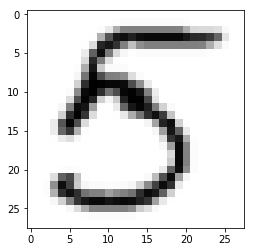

In [130]:
print(lbl_dict[str(train_label.values[1922])])
plt.imshow(train_data[1922].reshape([28, 28]), cmap = mpl.cm.binary)
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, train_data, y_train_5, cv=3, scoring="accuracy")

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [18]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, train_data, y_train_5, cv=3)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/anaconda3/lib/python3.6/site-packages/s

In [88]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[55926,  1433],
       [ 1017,  1624]])

In [22]:
y_train_pred[701]

False

In [23]:
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_train_5, y_train_pred))
print(recall_score(y_train_5, y_train_pred))

0.5916425158612046
0.48296035805626597


In [25]:
y_scores = cross_val_predict(sgd_clf, train_data, y_train_5, cv=3,
                                 method="decision_function")

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/anaconda3/lib/python3.6/site-packages/s

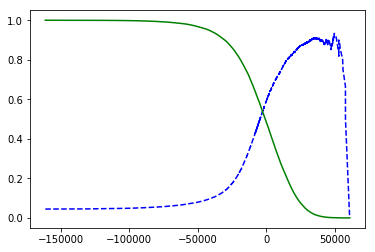

In [28]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

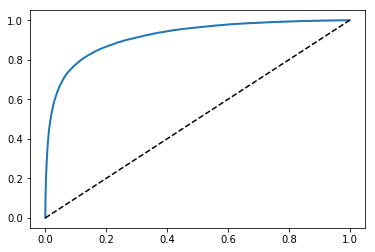

In [29]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')

plot_roc_curve(fpr, tpr)
plt.show()

In [30]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, train_data, y_train_5, cv=3,method="predict_proba")

In [32]:
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)


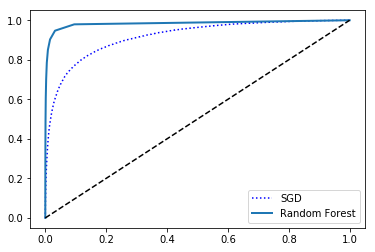

In [33]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [ ]:
sgd_clf.fit(train_data, train_label)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [ ]:
print(sgd_clf.predict([train_data[19]]))
sgd_clf.classes_

------------------------------------------------------------------------